In [15]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mpl_finance as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib import style

In [16]:
import bs4 #beautifulsoup4
import sklearn #scikit_learn
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
from scipy.stats import pearsonr
import datetime as dt

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
style.use('ggplot')

In [18]:
# Setting a Range for Time
start = dt.datetime(200,1,1)
end = dt.datetime(2018,12,31)

In [25]:
# Suppliers
df_CY= web.DataReader('CY','quandl',start,end)
#df_QCOM= web.DataReader('QCOM','quandl',start,end)
#df_SWKS= web.DataReader('SWKS','quandl',start,end)
#df_TXN= web.DataReader('TXN','quandl',start,end)
#df_MU= web.DataReader('MU','quandl',start,end)
#df_INTC= web.DataReader('INTC','quandl',start,end)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-01-01 00:00:00

In [26]:
# Parent Companies
# Tech
df_AAPL= web.DataReader('AAPL','quandl',start,end)
df_AMZN= web.DataReader('AMZN','quandl',start,end)
df_MSFT= web.DataReader('MSFT','quandl',start,end)
df_IRBT= web.DataReader('IRBT','quandl',start,end)
#df_GOOG= web.DataReader('MU','quandl',start,end)
#df_T= web.DataReader('T','quandl',start,end)
# Agriculture
#df_DE= web.DataReader('DE','quandl',start,end)
# Healthcare
#df_GE= web.DataReader('GE','quandl',start,end)
# Energy
#df_PCG= web.DataReader('PCG','quandl',start,end)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 200-01-01 00:00:00

In [27]:
# Showing the DataFrame
df_CY.head(5)

NameError: name 'df_CY' is not defined

<IPython.core.display.Javascript object>


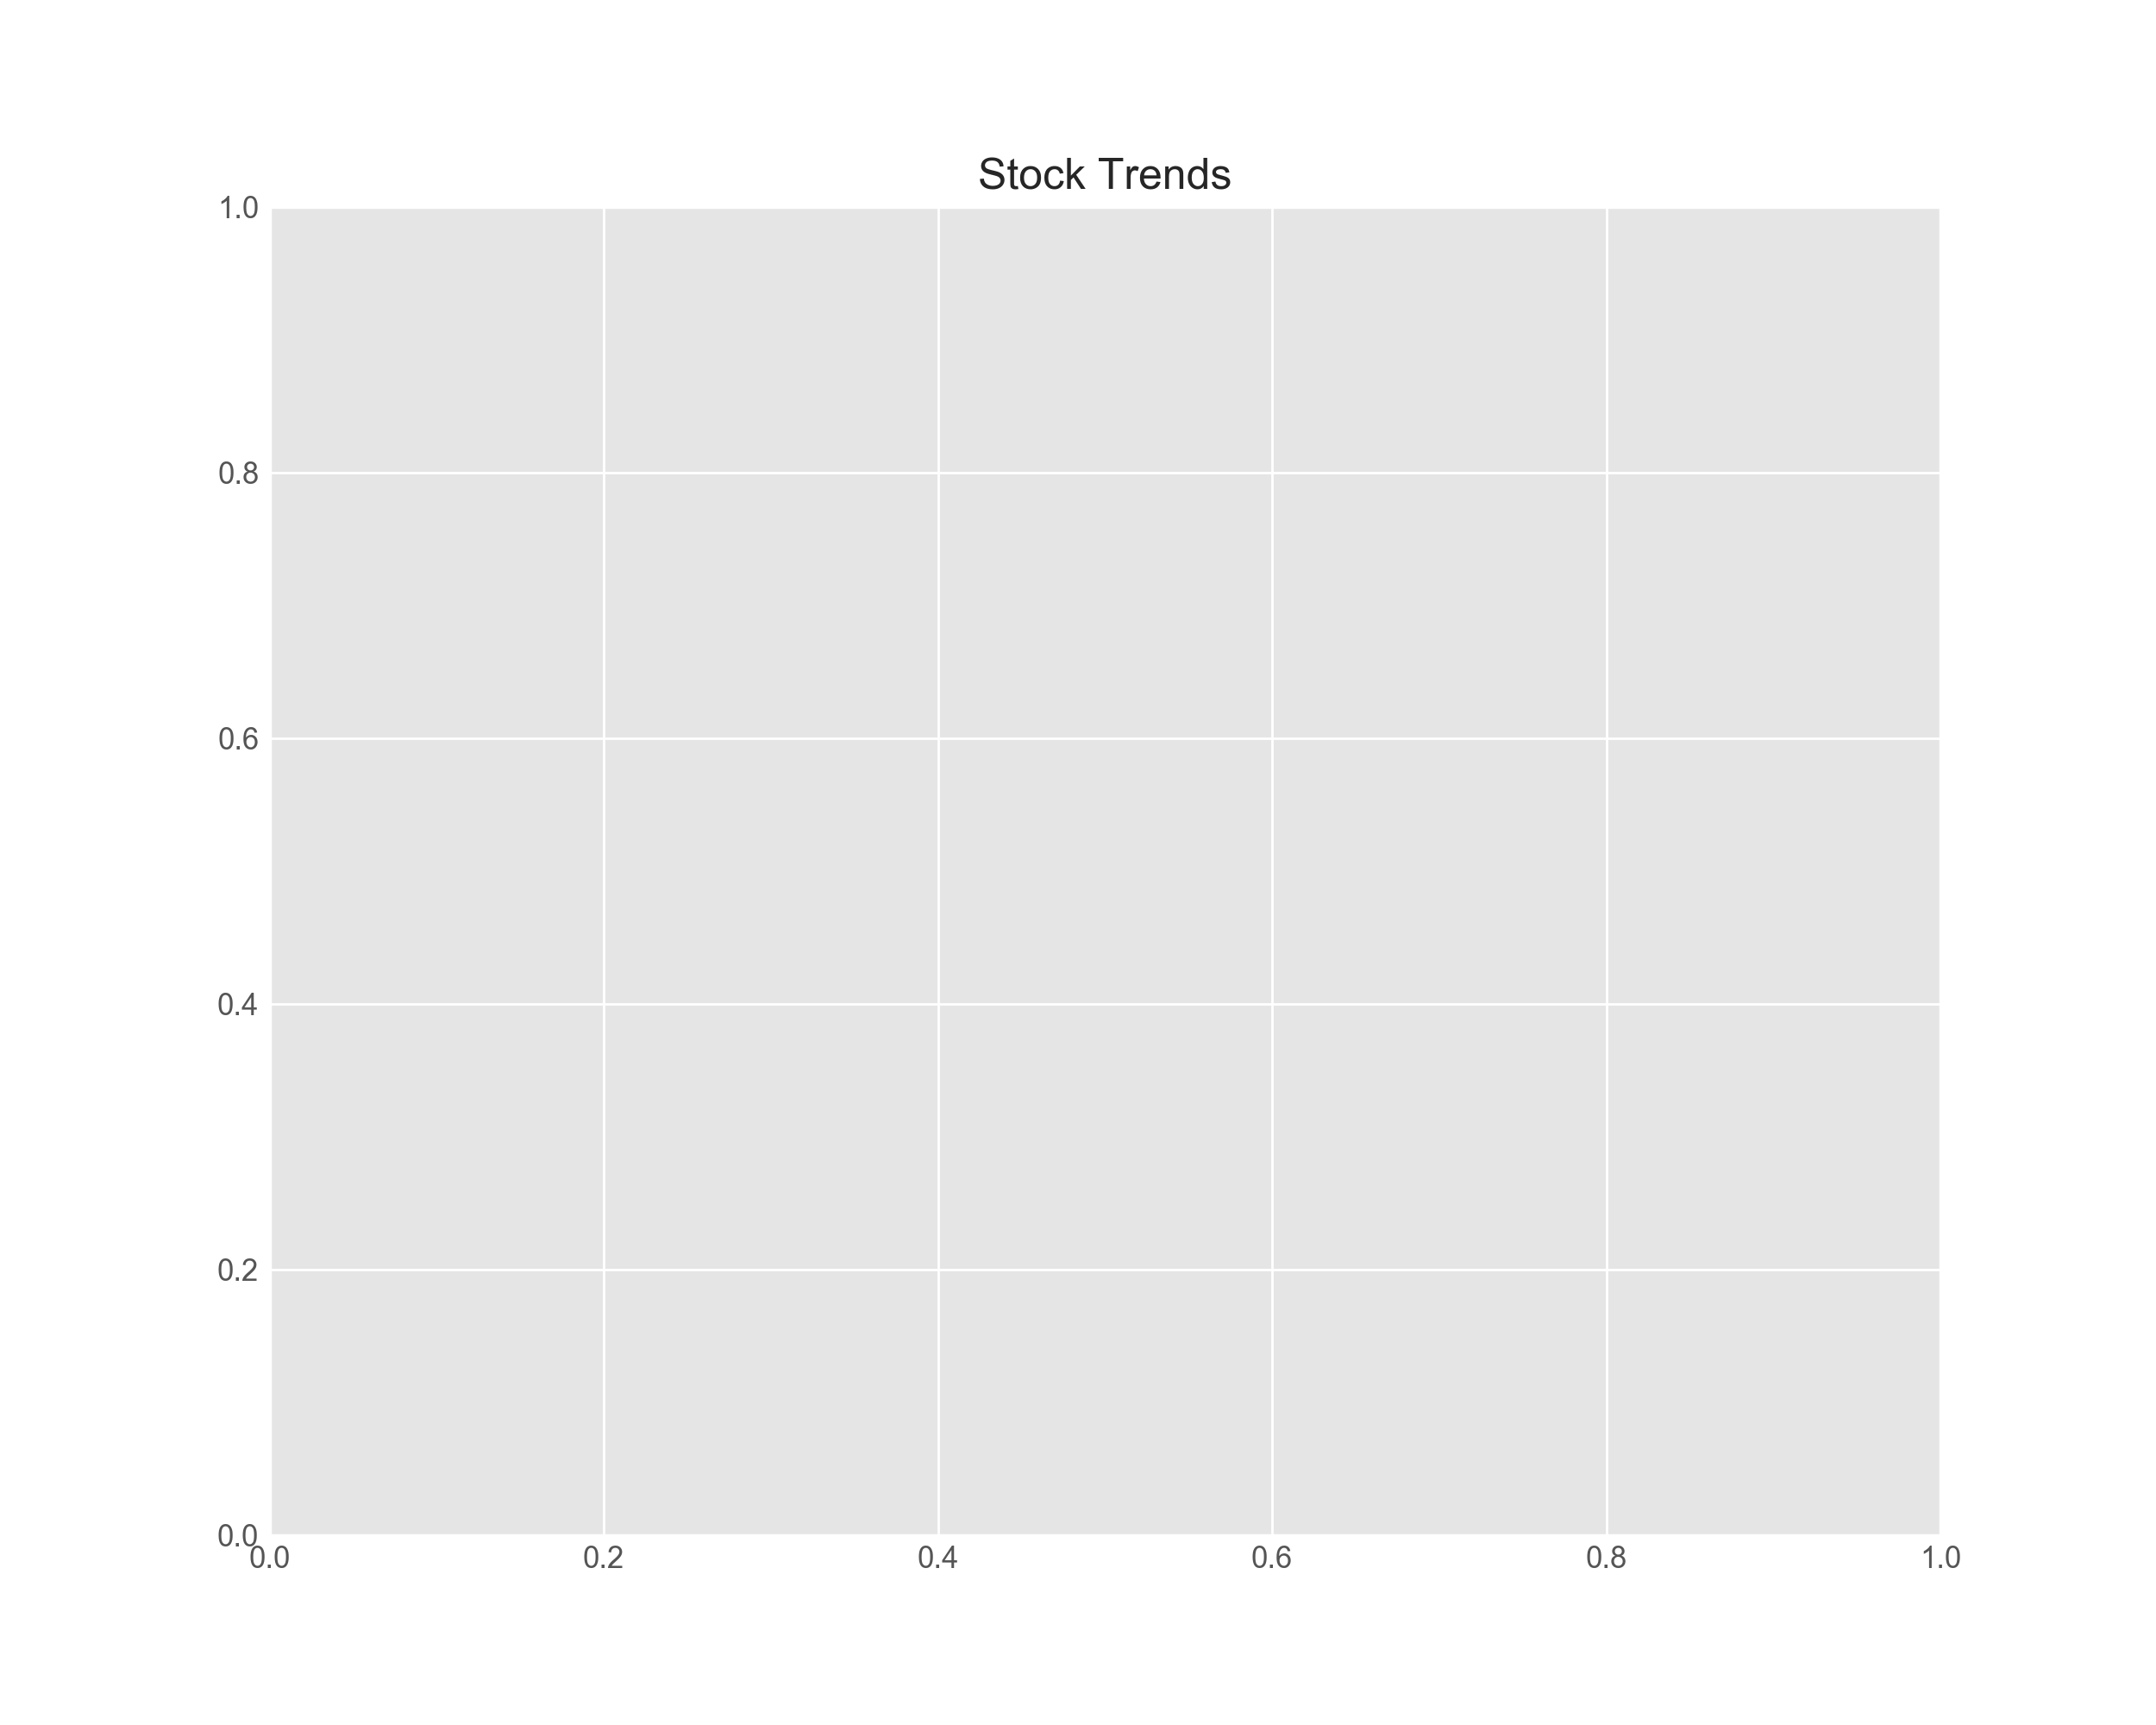

NameError: name 'df_CY' is not defined

In [28]:
fig1 = plt.figure(figsize=(10,8))
plt.title('Stock Trends')
plt.grid(True)
#plt.ylim(0,50)

plt.plot(df_CY.index,df_CY["AdjClose"],label="Cypress",alpha=0.9)
#plt.plot(df_QCOM.index,df_QCOM["AdjClose"],label="QCOM")
#plt.plot(df_SWKS.index,df_SWKS["AdjClose"],label="SWKS")
#plt.plot(df_TXN.index,df_TXN["AdjClose"],label="TXN")
#plt.plot(df_MU.index,df_MU["AdjClose"],label="MU")
#plt.plot(df_INTC.index,df_INTC["AdjClose"],label="INTC")

plt.plot(df_AAPL.index,df_AAPL["AdjClose"],label="Apple",alpha=0.9)
plt.plot(df_AMZN.index,df_AMZN["AdjClose"],label="Amazon",alpha=0.9)
plt.plot(df_MSFT.index,df_MSFT["AdjClose"],label="Microsoft",alpha=0.9)
plt.plot(df_IRBT.index,df_IRBT["AdjClose"],label="IRobot",alpha=0.9)
#plt.plot(df_GOOG.index,df_GOOG["AdjClose"],label="GOOG")
#plt.plot(df_T.index,df_T["AdjClose"],label="T")
#plt.plot(df_DE.index,df_DE["AdjClose"],label="DE")
#plt.plot(df_GE.index,df_GE["AdjClose"],label="GE")
#plt.plot(df_PCG.index,df_PCG["AdjClose"],label="PCG")

plt.ylabel("Stock Price")
plt.xlabel("Year")

plt.legend()

plt.savefig("/Users/carolineteti/Desktop/FIGURE1.png")

In [23]:
stock_df = pd.DataFrame({"Cypress_AdjClose":df_CY["AdjClose"],
                         #"QCOM_AdjClose":df_QCOM["AdjClose"],
                         #"MU_AdjClose":df_MU["AdjClose"],
                         #"SWKS_AdjClose":df_SWKS["AdjClose"],
                         #"TXN_AdjClose":df_TXN["AdjClose"],
                         #"MU_AdjClose":df_MU["AdjClose"],
                         #"INTC_AdjClose":df_INTC["AdjClose"],
                         "Apple_AdjClose":df_AAPL["AdjClose"],
                         "Amazon_AdjClose":df_AMZN["AdjClose"],
                         "Microsoft_AdjClose":df_MSFT["AdjClose"],
                         "IRobot_AdjClose":df_IRBT["AdjClose"],
                         #"GOOG_AdjClose":df_GOOG["AdjClose"],
                         #"T_AdjClose":df_T["AdjClose"],
                         #"DE_AdjClose":df_DE["AdjClose"],
                         #"GE_AdjClose":df_GE["AdjClose"],
                         #"PCG_AdjClose":df_PCG["AdjClose"],
                                 }) 

NameError: name 'df_CY' is not defined

In [24]:
stock_df_nona = stock_df.dropna()

NameError: name 'stock_df' is not defined

In [ ]:
stock_df_nona.head(5)

In [ ]:

pd.scatter_matrix(stock_df_nona, alpha = 0.8, figsize = (16,8), diagonal = 'kde')

In [7]:
correlation_df = stock_df_nona.corr(method="pearson")
correlation_df.head()

NameError: name 'stock_df_nona' is not defined

In [ ]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

In [ ]:
calculate_pvalues(stock_df_nona)